## Deep learning: Chapter 2


Example:  Classify handwritten digits

* grayscale images, 28x28 pixels into 10 categories
* [MNISt](https://en.wikipedia.org/wiki/MNIST_database) dataset: 60k training images, 10k test images


Terminology:

* **Class**: a category in a classification problem 
* **Sample**: datapoints
* **Label** class associatied with a specific sample

MNIST database is preloaded in KERASin set of four Numpy arrays

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

* `train_images` and `train_labels` frm the training set
* `test_images` and `test_labels` is test set on which model will be tested

In [2]:
print(f"Shape train_image = {train_images.shape}")
print(f"Length train_labels = {len(train_labels)}")
print(f"Shape test_images= {test_images.shape}")
print(f"Length test_labels = {len(test_labels)}")

Shape train_image = (60000, 28, 28)
Length train_labels = 60000
Shape test_images= (10000, 28, 28)
Length test_labels = 10000


### Workflow: 

1. feed neuronal network training data
2. associate images with labels
3. produce predictions for test images
4. verify whether predictions match test labels

In [3]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

* layer: is a filter
* layer extract representations of data fed into them.
* layers are chained

Network above consists of a sequence of two dense layers that are *densely* connected (or *fully* connected) neural layers. The second layer is a 10 way *softmax* layer which rturns 10 probability scores (summing to 1). Each score will give probability that current digit belongs to one of the 10 digit classes.

Make network ready for training need to pick three more things as part of the *compilation* step: 

* optimizer (method to update network)
* Loss function (how network measures performance on training data)
* Metrics to monitor during training and testing (here: accuracy of classification)

In [4]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

* reshape images into a `float32` array of shape (60000, 28*28)
* rescale 8 bit images into values in interval `[0, 1]`

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28 *28))
test_images = test_images.astype('float32')/255

* categorically encode labels

In [6]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

* train network.  Call network's fit method

In [7]:
network.fit(train_images, train_labels, epochs =5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2562 - accuracy: 0.9264
Epoch 2/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.1041 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0680 - accuracy: 0.9804
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0498 - accuracy: 0.9857
Epoch 5/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0377 - accuracy: 0.9890


In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


10000/10000 [==============================] - 0s 37us/step
test_acc: 0.9800000190734863


This is lower than the training set accuracy.  This is an example of *overfitting*. 

### Data representations for neural networks

Tensors:

* rank 0: scalar `0`
* rank 1: vector `[1,4,5,7]`
* rank 2: array  `[[11,12,13], [21, 22, 23]]`
* rank n: has n axes

note: vector `[1,4,5,7]` has 4 dimensions, but is a tensor of rank 1 (often one speaks, inaccurately, of a one dimensional tensor)

Types of data:

* Vector data: e.g. dataset of dext documents where each is represented by the counts of how many times each word in a dictionary appears in it.  e.g. tensor of shape `(500, 20000)` might describe 500 documents with dictionary of 20000 words.

* Time series data: E.g.stock prices as a tensor of rank 3: 250 days with values every minute (390 working minutes per day), recording low, high and current price for each minute `(250, 390, 3)`

* Image data: tensor of rank 4: e.g. 128 images, 256 x 256 pixels, 3 colour channels. `(128, 256, 256, 3)`. note Tensorflow convention for order is `(samples, height, width, color_depth)` 

### Tensor attributes

* Number of axes (rank)
* shape: dimension of tensor along each axis
* Data type (usually `dtype` in python libraries)

In [3]:
print('shape of train_images = ', train_images.shape)  #Note: above we have vectorised 28x28 images

shape of train_images =  (60000, 28, 28)


In [4]:
import numpy as np

In [5]:
y = np.reshape(train_images, (60000, 28,28)) #reshape into tensor of rank 3 (sample, height, width)
print('shape of y =', y.shape)

shape of y = (60000, 28, 28)


In [6]:
import matplotlib.pyplot as plt

In [7]:
digit = y[3]
digit.shape

(28, 28)

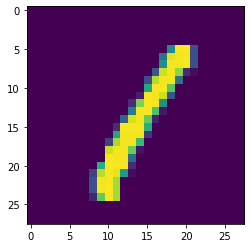

In [8]:
plt.imshow(digit)
plt.show()

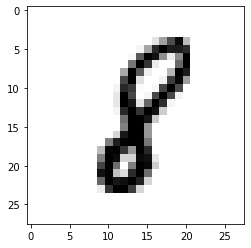

In [9]:
digit = y[34001]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Slicing tensors:

Slicing just bottom half of 8:

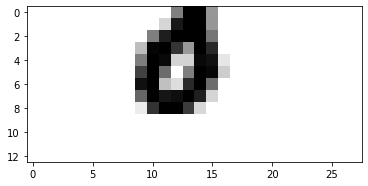

In [10]:
digit = y[34001, 15:, :]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

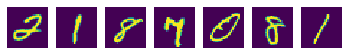

In [25]:
counter=0
start_index = 1011
tiles = 7
images = y[start_index:start_index+tiles]


fig=plt.figure()
for i in range(1,len(images)+1):
    sub = fig.add_subplot(1, len(images), i)
    sub.axis('off')
    sub.imshow(images[i-1])
    
plt.show()

### Data batches

the first axes (axis 0) is called the **sample axis**.  Usually the entire dataset can't be processed at once and one needs to break the dataset into smaller **batches**.  

In [15]:
batch_1 = train_images[:128]

batch_4 = train_images[128*4:128*(4+1)]  #batch n is from dataset[128*n:128*(n+1)] 

len(batch_4)

128

## Tensor operations

All transformations learned by DNN can be reduced to a small number of tensor operations (add, multiply, etc)

E.g.
```python
network.add(layers.Dense(512, activation = 'relu', input_shape=(28 * 28,)))
```

this layer cab be interpreted as a function that takes a 2D tensor (vecor samples) and returns another 2D tensor.

The function is:

```python
output = relu(dot(W, input) + b
```

* This includes a dot product between a 2D tensor W and an input tensor and adds a vector b. 
* It also includes a **rectified linear unit** function defined as `max(x, 0)`

### Rectified linear Unit - relu

In [39]:
def naive_relu(x):
    '''Naive implementation of relu (rectified linear unit) function
    takes tensor x of rank 2
    ''' 
    assert len(x.shape) == 2, 'x has more than 2 axes, not an image!'
    x = x.copy()    #produce a copy of x without overwriting input tensor
   
    
    for i in range(0, x.shape[0]):
        for j in range(0, x.shape[1]):
            x[i, j]=max(x[i,j], 0)
    return x

In [60]:
x = 2.0*(np.random.random((3,4))-0.5)  #random.random only produces positive numbers in (0, 1)

print(f"x=\n{x} \n")
print(f"Relu(x) = naive_relu(x) =\n{naive_relu(x)}")

x=
[[ 0.15304079  0.11658962  0.25870324 -0.55225153]
 [-0.28590247  0.30955119 -0.67407404 -0.76107192]
 [-0.03593688  0.42629766  0.23669738  0.62289514]] 

Relu(x) = naive_relu(x) =
[[0.15304079 0.11658962 0.25870324 0.        ]
 [0.         0.30955119 0.         0.        ]
 [0.         0.42629766 0.23669738 0.62289514]]


same is achieved with the very simple inbuilt numpy method:

In [61]:
print(f"Relu(x) = np.maximum(x, 0) =\n{np.maximum(x,0)}")

Relu(x) = np.maximum(x, 0) =
[[0.15304079 0.11658962 0.25870324 0.        ]
 [0.         0.30955119 0.         0.        ]
 [0.         0.42629766 0.23669738 0.62289514]]


## naive Addition

In [73]:
def naive_addition(x, y):
    assert len(x.shape)== 2, "Shape of x or y not rank 2!"
    assert x.shape == y.shape, "Shape of x and y not same!"
    
    x=x.copy()
    y=y.copy()
    
    for i in range(0, x.shape[0]):
        for j in range(0, x.shape[1]):
            x[i,j]+=y[i,j]
            
    return x

In [78]:
a = np.random.randint(5, size=(2,3))
print(f"a =\n{a}")

b = np.random.randint(5, size=(2,3))
print(f"b =\n{b}")

print(f"a + b = naive_addition(a, b) =\n{naive_addition(a, b)}")

a =
[[2 3 2]
 [3 4 0]]
b =
[[4 2 4]
 [1 1 4]]
a + b = naive_addition(a, b) =
[[6 5 6]
 [4 5 4]]


### Broadcasting

Means stretching dimensions of lower rank tensor to those of higher rank tensor for efficient computation.

See [broadcasting article](https://numpy.org/devdocs/user/theory.broadcasting.html)

* works from last axis backward to front
* final dimensions must match

E.g. adding `1` to `[1,2,3]` is the same as broadcasting `1` to `[1,1,1]` and adding `[1,1,1]` to `[1,2,3]`.

In [79]:
import numpy as np

In [80]:
a = np.arange(1,4)
print(a)


[1 2 3]


In [81]:
x = np.arange(1,11).astype(float)
y = np.ones((2, 3, 10)).astype(float)
y[:]=x
print('y=\n',y)

print('\nrank of y:', y.ndim)

print('\nshape of y:', y.shape)

y=
 [[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]

 [[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]]

rank of y: 3

shape of y: (2, 3, 10)


### matrix rotation

$$ x \cdot R = y$$

where

\begin{equation}
R = 
\begin{bmatrix}
\cos x & \sin x \\
-\sin x & \cos x
\end{bmatrix}
\end{equation}


\begin{equation} 
\begin{pmatrix}
x \\
y
\end{pmatrix}
\begin{bmatrix}
\cos \theta & \sin \theta \\
-\sin \theta & \cos \theta
\end{bmatrix}
=
\begin{pmatrix}
x' \\
y'
\end{pmatrix}
\end{equation}


## Gradient-based optimisation

each neural layer transforms input data as follows:

```
output = relu(dot(W, input) +b)
```

where W and b are tensors that are attributes of layers, called weights (*kernel*) or trainable parameters (*bias*) of the layer.  Initially, this does nothing useful, but gradually W and b are adjusted, based on feedback signal.  This adjustment takes place in a *training loop*.  Specifically

1. Draw batch of training samples `x` and corresponding targets `y`
1. Run network on `x` (called *forward pass*) to obain `y_predicted`
1. Compute loss of network on batch, a measure of mismatch between `y_predicted` and `y`
1. Update  weights of `W`, `b` so that loss is reduced. 

Repeat, until loss is low: The network has now learned to map inputs to their correct targets.  
* Step 1 is simple: just I/O code.
* Steps 2 and 3 are merely application of a handful of tensor ops.
* Step 4 is the difficult part.  How do we decide whether `W` and `b` coefficients should be increased or decreased? And by how much?


Could do latter by freezing all coefficients except one, which you vary and recalculate loss.  If loss greater, change coefficient accordingly, etc.  Repeat sequentially for all coefficients. Problem: Terribly inefficient! There may be 10s or even 100s of thousands of coefficients to optimise: this makes problem intractable.  However: all operations described are differentiable. Better way: compute **gradient** of the loss wih regards to network coefficients

**Derivative:**

Approximate `f` around a point `p` as:

`f(x + epsilon_x) = y + a * epsilon_x`

The slope `a` is called the derivative of `f` in `p`

## Tensor multiplication

### vector dot product


$$ z = \vec{x} \cdot \vec{y}$$

where $z$ is a scalar

In [118]:
def naive_vector_dot(x,y):
    assert len(x.shape)==1, "rank != 1: x not a vector!"
    assert len(y.shape)==1, "rank != 1: y not a vector!"
    assert x.shape[0]==y.shape[0], "len(x) != len(y): shapes incompatible!"
    
    x=x.copy()
    y=y.copy() #ensures that original x, y not overridden
    z=0.0
    
    for i in range(x.shape[0]):
        z+=x[i]*y[i]
    
    return z

In [119]:
x=np.array([1,2,3])
y=np.array([4,5,6])

print(f"{x}.{y}=\n {naive_vector_dot(x, y)}")

[1 2 3].[4 5 6]=
 32.0


### matrix - vector product:

$$ \vec{z} = \mathbf{x} \cdot \vec{y}$$

where $\mathbf{x}$ is a matrix. 

In [115]:
def naive_matrix_vec_dot(x, y):
    assert len(x.shape)==2, "rank of x != 2: not a matrix!"
    assert len(y.shape)==1, "rank of y != 1: not a vector!"
    assert x.shape[1]==y.shape[0], "x_cols != y_rows: shapes not compatible!"
    
    x=x.copy()
    y=y.copy()
    z=np.zeros(x.shape[0])
               
    for i in range(x.shape[1]):
        for j in range(x.shape[0]):
            z[i]+= x[i, j]*y[j]
    
    return z

In [117]:
x=np.array([[1,2], [3,4]])
y=np.array([2,3])

print(f"{x}.{y}=\n {naive_matrix_vec_dot(x, y)}")

[[1 2]
 [3 4]].[2 3]=
 [ 8. 18.]


better way: make use of the vector dot product and multiply row vectors of x with column y:


In [120]:
def naive_matrix_vec_dot2(x,y):
    assert len(x.shape)==2, "rank of x != 2: not a matrix!"
    assert len(y.shape)==1, "rank of y != 1: not a vector!"
    assert x.shape[1]==y.shape[0], "x_cols != y_rows: shapes not compatible!"
    
    x=x.copy()
    y=y.copy()
    z=np.zeros(x.shape[0])
    
    for i in range(x.shape[0]):
        z[i]=naive_vector_dot(x[i,:], y)
        
    return z

In [121]:
x=np.array([[1,2], [3,4]])
y=np.array([2,3])

print(f"{x}.{y}=\n {naive_matrix_vec_dot2(x, y)}")

[[1 2]
 [3 4]].[2 3]=
 [ 8. 18.]


### Tensor dot product:

$$ \mathbf{z} = \mathbf{x} \cdot \mathbf{y}$$

where $\mathbf{x}$ and $\mathbf{y}$ ar shape-compatible matrices (i.e. `len(x_rows)=len(y_columns)`. 